In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import make_blobs

In [13]:
from sklearn.model_selection import train_test_split

In [5]:
data=np.load('/content/mnist_train_small.npy')

In [6]:
data.shape


(19999, 785)

In [7]:
data

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
X=data[:,1:]
y=data[:,0]

In [9]:
X.shape,y.shape

((19999, 784), (19999,))

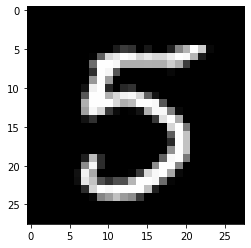

In [11]:
plt.imshow(X[0].reshape(28,28),cmap='gray')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [17]:
X_train.shape,y_train.shape

((13399, 784), (13399,))

In [18]:
X_test.shape,y_test.shape

((6600, 784), (6600,))

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
model=KNeighborsClassifier()

In [21]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [23]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [24]:
 model.score(X_test,y_test)

0.9542424242424242

## **CUSTOM KNN** 

In [25]:
class CustomKNN:
    # constructor
    def __init__(self, n_neighbours=5):
        self.n_neighbours = n_neighbours
        
    # training function
    def fit(self, X, y):
        self._X = (X - X.mean()) / X.std() # standardisation
        self._y = y
    
    # predict point
    # given a single point, tell me which class it belongs to 
    def predict_point(self, point):
        # storing the dis of given 'point' from each point in training data
        list_dist = []
        
        # these points are from my training data
        for x_point, y_point in zip(self._X, self._y):
            dist_point = ((point - x_point) ** 2).sum()
            list_dist.append([dist_point, y_point])
        
        ## sorting the list according to the distance
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        
        # taking the count 
        items, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
        ans = items[np.argmax(counts)]
        return ans
            
    # predict
    # give me answer for each number in the array
    def predict(self, X):
        results = []
        X = (X - X.mean()) / X.std() 
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype=int)
    
    # score to measure my accuracy
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)
    
    

In [26]:
m2 = CustomKNN()

In [27]:
m2.fit(X_train, y_train)

In [28]:
m2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [29]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [30]:
m2.score(X_test[:100], y_test[:100])

0.95

In [37]:
li = [ 
    [23, 0],
    [45, 1],
    [19, 0],
    [3, 2],
    [10, 0],
    [34, 2],
    [100, 1]
]


In [38]:
sorted_li = sorted(li)

In [39]:
top_k = sorted_li[:5]

In [40]:
top_k

[[3, 2], [10, 0], [19, 0], [23, 0], [34, 2]]

In [41]:
li, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)

In [42]:
li, counts

(array([0, 2]), array([3, 2]))